In [16]:
# Code to convert new dataset file from json to csv
path = 'datasets/'
import json
import csv

f = open('datasets/film_imdb.json')
film_data = json.load(f)

output = csv.writer(open("datasets/film_data.csv", "w"))
output.writerow(film_data[0].keys())
for item in film_data:
    output.writerow(item.values())

In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report

from amb_sdk.sdk import DarwinSdk

In [3]:
# Login
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('claire.mcafee@gmail.com', 'Fhze5hUMn3')

if not status:
    print(msg)

In [4]:
path = 'datasets/'

In [5]:
def title_fix(title):
    if title[-5:] == ", The":
        return "The " + title[:-5]
    elif title[-3:] == ", A":
        return "A " + title[:-3]
    return title

dataset1_name = 'MovieBudgetsAndBoxOfficeEarnings.csv'
df1 = pd.read_csv(os.path.join(path, dataset1_name))
df1.head()

dataset2_name = 'IMDBMovieDatabase.csv'
df2 = pd.read_csv(os.path.join(path, dataset2_name))
df2.head()

df1 = df1.drop('Day', axis=1)
df2 = df2.drop(['var1', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10'], axis=1)
df1['title'] = df1['title'].apply(title_fix)
df2['title'] = df2['title'].apply(title_fix)


In [ ]:
dataset4_name = 'film_data.csv'
df4 = pd.read_csv(os.path.join(path, dataset4_name), error_bad_lines=False)

df4 = df4.drop(['Plot', 'Poster', 'Type', 'Response'], axis=1)


# imdb_films = imdb_films[imdb_films.Language != 'English']

# indices = df[df.Language == 'English'].index
# df4.drop(indices, inplace=True)

# df = df[df.Language != 'English']
# print(imdb_films)
df4.head()

In [6]:
dataset3_name = 'BechdelTest.csv'
df3 = pd.read_csv(os.path.join(path, dataset3_name))
df3 = df3[["title", "binary"]].copy()
df3.rename(index=str, inplace = True, columns={"binary": "bechdel"})
df3.head()

,title,bechdel
0,Dredd 3D,PASS
1,2 Guns,FAIL
2,47 Ronin,FAIL
3,About Time,PASS
4,After Earth,FAIL


In [7]:
df = df1.merge(df2, on=['title', 'year'])
df = df.merge(df3, on='title', how='left')

df4.drop_duplicates(inplace=True)
df4.rename(index=str, inplace = True, columns={"Title": "title"})
df = df.merge(df4, on='title')
print(df.keys())

                                                  title Month  year  \
0                                               Titanic   Dec  1997   
1         The Lord of the Rings: The Return of the King   Dec  2003   
2                                         Jurassic Park   Jun  1993   
3                                         The Lion King   Jun  1994   
4                                               Shrek 2   May  2004   
5                                          Finding Nemo   May  2003   
6                 The Lord of the Rings: The Two Towers   Dec  2002   
7     The Lord of the Rings: The Fellowship of the Ring   Dec  2001   
8               Harry Potter and the Chamber of Secrets   Nov  2002   
9                                            Spider-Man   May  2002   
10                                     Independence Day   Jul  1996   
11             Harry Potter and the Prisoner of Azkaban   Jun  2004   
12                                         Spider-Man 2   Jun  2004   
13    

(-0.659, 26.375]      939
(26.375, 52.749]      413
(52.749, 79.124]      230
(79.124, 105.498]     115
(105.498, 131.873]     83
(131.873, 158.247]     48
(158.247, 184.622]     45
(210.996, 237.371]     14
(184.622, 210.996]     13
(237.371, 263.746]     11
(290.12, 316.495]       7
(369.244, 395.618]      4
(263.746, 290.12]       4
(316.495, 342.869]      3
(395.618, 421.993]      2
(421.993, 448.367]      2
(448.367, 474.742]      1
(632.989, 659.364]      1
(606.615, 632.989]      0
(342.869, 369.244]      0
(474.742, 501.117]      0
(501.117, 527.491]      0
(527.491, 553.866]      0
(553.866, 580.24]       0
(580.24, 606.615]       0
Name: Domestic Gross($M), dtype: int64


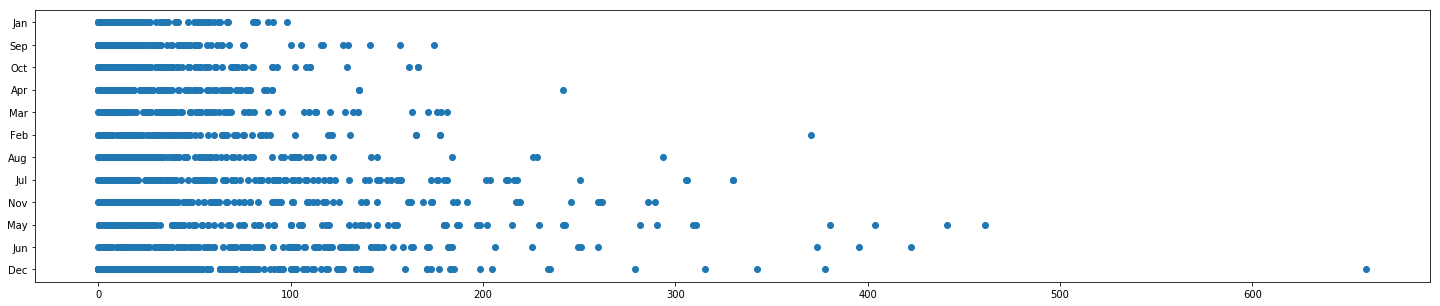

In [8]:

bins = pd.cut(df['Domestic Gross($M)'], bins=25).value_counts()
print(bins)

plt.figure(figsize=(25,5))
plt.scatter(x=df['Domestic Gross($M)'], y=df['Month'])



In [9]:
# Jacob having fun
import sklearn as sk
import sklearn.cluster as clstr
import array

df['lame'] = 1
nd = df[['lame', 'Domestic Gross($M)']].copy()
km = sk.cluster.KMeans(n_clusters=2)
km.fit(nd)
km.labels_
km.predict([[1,163]])
df.drop('lame', axis=1)
df.dropna()

In [ ]:
import matplotlib.colors as colo

df['label'] = df['Domestic Gross($M)'].apply(lambda x: 1 if x >= 163 else 0)
plt.figure(figsize=(14,14))
plt.scatter(x=df['Budget($M)'], y=df['Action'], c=df['label'], cmap=colo.ListedColormap(['red', 'green']))
plt.show()

In [10]:

df['label'] = df['Domestic Gross($M)'].apply(lambda x: 1 if x >= 163 else 0)


In [11]:
df = df.drop(['Domestic Gross($M)', 'Worldwide Gross($M)', 'budget'], axis=1)

In [12]:


df.rename(index=str, inplace = True, columns={"Month": "month", "Budget($M)": "budget", "Action": "action", 
                              "Animation": "animation", "Comedy": "comedy", "Drama": "drama", 
                              "Documentary": "documentary", "Romance": "romance", "Short": "short"})


df.head()

,title,month,year,budget,length,rating,votes,mpaa,action,animation,comedy,drama,documentary,romance,short,bechdel,label
0,Titanic,Dec,1997,200.0,194,6.9,90195,PG-13,0,0,0,1,0,1,0,PASS,1
1,The Lord of the Rings: The Return of the King,Dec,2003,94.0,251,9.0,103631,PG-13,1,0,0,0,0,0,0,FAIL,1
2,Jurassic Park,Jun,1993,63.0,127,7.4,57473,NaN,1,0,0,0,0,0,0,PASS,1
3,The Lion King,Jun,1994,79.3,89,7.8,32924,NaN,0,1,1,0,0,0,0,FAIL,1
4,Shrek 2,May,2004,70.0,92,7.8,27236,PG,0,1,1,0,0,0,0,PASS,1


In [13]:
# put dataframe into a csv file
resulting_csv = "result_data.csv"
df.to_csv((path + resulting_csv), index=False)

In [14]:
# Upload dataset
ds.delete_dataset(resulting_csv)
status, dataset = ds.upload_dataset(os.path.join(path, resulting_csv))
if not status:
    print(dataset)

In [15]:
# clean dataset
target = "label"
status, job_id = ds.clean_data(resulting_csv, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T22:03:47.153148', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['result_data.csv'], 'artifact_names': ['f31a55166a474735a9ca69d1c3e0121e'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-02T22:03:47.153148', 'endtime': '2019-04-02T22:03:49.756173', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['result_data.csv'], 'artifact_names': ['f31a55166a474735a9ca69d1c3e0121e'], 'model_name': None, 'job_error': ''}


In [16]:
ds.delete_model(target+"_model")
model = target + "_model"
status, job_id = ds.create_model(dataset_names = resulting_csv, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T22:04:04.353353', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-02T22:04:04.353353', 'endtime': None, 'percent_complete': 2, 'job_type': 'TrainModel', 'loss': 0.3580731451511383, 'generations': 3, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T22:04:04.353353', 'endtime': None, 'percent_complete': 2, 'job_type': 'TrainModel', 'loss': 0.3580731451511383, 'generations': 3, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T22:04:04.353353', 'endtime': None, 'percent_complete': 2, 'job_type': 'TrainModel', 'loss': 0.35807314515113

In [17]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = resulting_csv,
                                          model_name = model,
                                          max_train_time = '00:05')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T22:06:21.095601', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.1066145971417427, 'generations': 3, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-02T22:06:21.095601', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.1066145971417427, 'generations': 6, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T22:06:21.095601', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.1066145971417427, 'generations': 6, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T22:06:21.095601', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss'

In [18]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Complete', 'starttime': '2019-04-02T22:10:08.144717', 'endtime': '2019-04-02T22:10:09.330826', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.09840010851621628, 'generations': 9, 'dataset_names': None, 'artifact_names': ['181b4dde347b41489aa02727cd0df4cd'], 'model_name': 'label_model', 'job_error': ''}


In [19]:
feature_importance[0:]

votes              0.343903
rating             0.140570
budget             0.131549
length             0.075550
year               0.043992
month = May        0.035126
mpaa = R           0.033636
action = 1         0.025912
bechdel = PASS     0.024533
drama = 1          0.022272
mpaa = PG-13       0.021726
mpaa = PG          0.014076
month = Jul        0.012854
animation = 1      0.012813
comedy = 1         0.011819
month = Feb        0.008757
month = Dec        0.008165
month = Nov        0.006599
romance = 1        0.006002
month = Jun        0.005206
month = Aug        0.004567
month = Oct        0.004141
month = Mar        0.003195
month = Sep        0.002888
month = Jan        0.000136
documentary = 1    0.000013
short              0.000000
dtype: float64

In [20]:
status, artifact = ds.run_model(resulting_csv, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-02T22:10:10.763727', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.09840010851621628, 'generations': 9, 'dataset_names': ['result_data.csv'], 'artifact_names': ['60f08fe548c64dc59249ed4539f3c988'], 'model_name': 'label_model', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-02T22:10:10.763727', 'endtime': '2019-04-02T22:10:18.769748', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.09840010851621628, 'generations': 9, 'dataset_names': ['result_data.csv'], 'artifact_names': ['60f08fe548c64dc59249ed4539f3c988'], 'model_name': 'label_model', 'job_error': ''}


(True, 'Job completed')

In [21]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,label,prob_0,prob_1
0,1,0.021711,0.978289
1,1,0.107719,0.892281
2,1,0.307413,0.692587
3,1,0.247017,0.752983
4,1,0.304795,0.695205


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1835
           1       0.76      0.50      0.60       100

   micro avg       0.97      0.97      0.97      1935
   macro avg       0.87      0.75      0.79      1935
weighted avg       0.96      0.97      0.96      1935



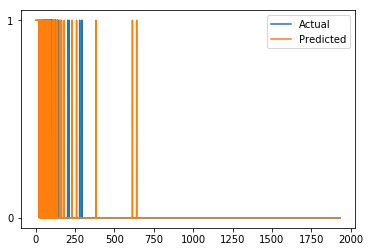

In [22]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [23]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

[{'layer 1': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 21}}}, {'layer 2': {'type': 'LinearGene', 'parameters': {'activation': 'selu', 'numunits': 66}}}, {'layer 3': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 2}}}]
